# Import Library

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib as mlp
import matplotlib.pyplot as plt

# Data Overview

In [3]:
data = pd.read_csv('Telco_Customer_Engineeredv2.csv')

In [4]:
data.head().style.background_gradient()

,Customer ID,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR),Total Purchase,Num Product Used,Internet Access
0,0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,70.005000,Yes,106.816666,-6.200000,4210.700000,140.010000,2,Yes
1,1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,91.910000,Yes,106.816666,-6.200000,3511.300000,183.820000,0,Yes
2,2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,129.545000,Yes,106.816666,-6.200000,6983.600000,1036.360000,2,Yes
3,3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,136.240000,Yes,106.816666,-6.200000,6503.900000,3814.720000,2,Yes
4,4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,134.810000,Yes,106.816666,-6.200000,6942.000000,6605.690000,3,Yes


In [5]:
data.shape

(7043, 19)

The minority class (churned) covers 26% proportion of the dataset, this indicate the mildly imbalanced dataset.

In [6]:
data['Churn Label'].value_counts(normalize=True)*100

No     73.463013
Yes    26.536987
Name: Churn Label, dtype: float64

In [7]:
list_item = []
for col in data.columns:
    list_item.append([col, data[col].dtype, data[col].isna().sum(), 100*data[col].isna().sum()/len(data[col]), data[col].nunique(), data[col].unique()[:4]])
desc_df = pd.DataFrame(data=list_item, columns='feature data_type null_num null_pct unique_num unique_sample'.split())
desc_df.style.background_gradient()

,feature,data_type,null_num,null_pct,unique_num,unique_sample
0,Customer ID,int64,0,0.000000,7043,[0 1 2 3]
1,Tenure Months,int64,0,0.000000,73,[ 2 8 28 49]
2,Location,object,0,0.000000,2,['Jakarta' 'Bandung']
3,Device Class,object,0,0.000000,3,['Mid End' 'High End' 'Low End']
4,Games Product,object,0,0.000000,2,['Yes' 'No']
5,Music Product,object,0,0.000000,2,['Yes' 'No']
6,Education Product,object,0,0.000000,2,['No' 'Yes']
7,Call Center,object,0,0.000000,2,['No' 'Yes']
8,Video Product,object,0,0.000000,2,['No' 'Yes']
9,Use MyApp,object,0,0.000000,2,['No' 'Yes']


In [19]:
data['Num Product Used'] = data['Num Product Used'].astype('object')

# Num Product Zero

In [20]:
mask = (data['Num Product Used'] == 0)
df = data[mask]

In [21]:
df.shape

(2535, 19)

## Churn Rate

In [22]:
df['Churn Label'].value_counts(normalize=True)*100

No     75.226824
Yes    24.773176
Name: Churn Label, dtype: float64

## Bivariate

### Numerical Analysis

In [23]:
numerical_cols = list(set(df.select_dtypes(exclude='object').columns) - set(['Longitude', 'Latitude']))
numerical_cols

['Tenure Months',
 'Monthly Purchase (Thou. IDR)',
 'Total Purchase',
 'CLTV (Predicted Thou. IDR)',
 'Customer ID']

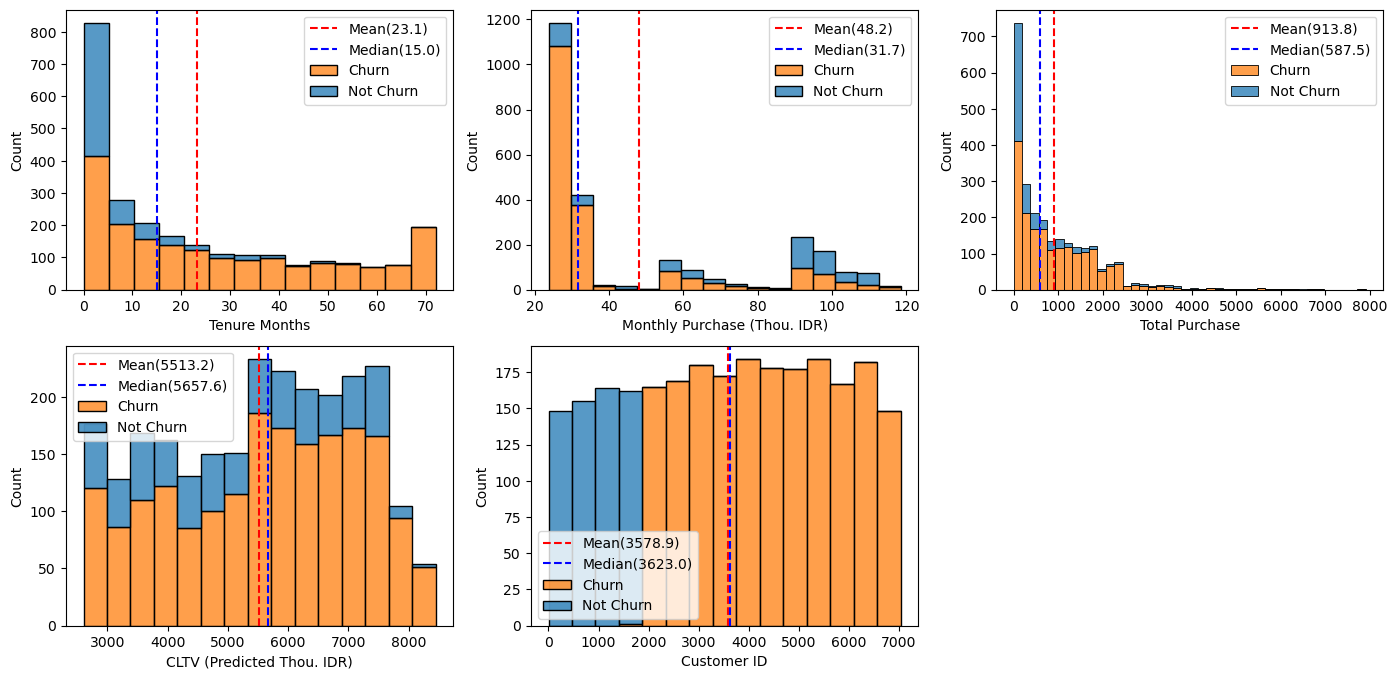

In [24]:
x_text_coor = [35, 5800, 100]
y_text_coor = [800, 450, 800]
# Create Distplot for Each Numerical Feature
plt.figure(figsize=(17,8))
for i in range(0, len(numerical_cols)):
    plt.subplot(2, 3, i+1)
    sns.histplot(x=df[numerical_cols[i]], hue=df['Churn Label'], multiple='stack')
    plt.xlabel(numerical_cols[i])
    
    mean=round(df[numerical_cols[i]].mean(), 1)
    median=round(df[numerical_cols[i]].median(), 1)
    plt.axvline(mean, color='red', linestyle='--') 
    plt.axvline(median, color='blue', linestyle='--') 
    plt.legend(labels=[f'Mean({mean})',f'Median({median})', 'Churn', 'Not Churn'])
    #plt.text(x_text_coor[i], y_text_coor[i], f'mean={mean}', color='red', ha='left', va='top')
    #plt.tight_layout()

### Categorical Analysis

In [25]:
cat_cols = df.select_dtypes(include='object').columns
cat_cols

Index(['Location', 'Device Class', 'Games Product', 'Music Product',
       'Education Product', 'Call Center', 'Video Product', 'Use MyApp',
       'Payment Method', 'Churn Label', 'Num Product Used', 'Internet Access'],
      dtype='object')

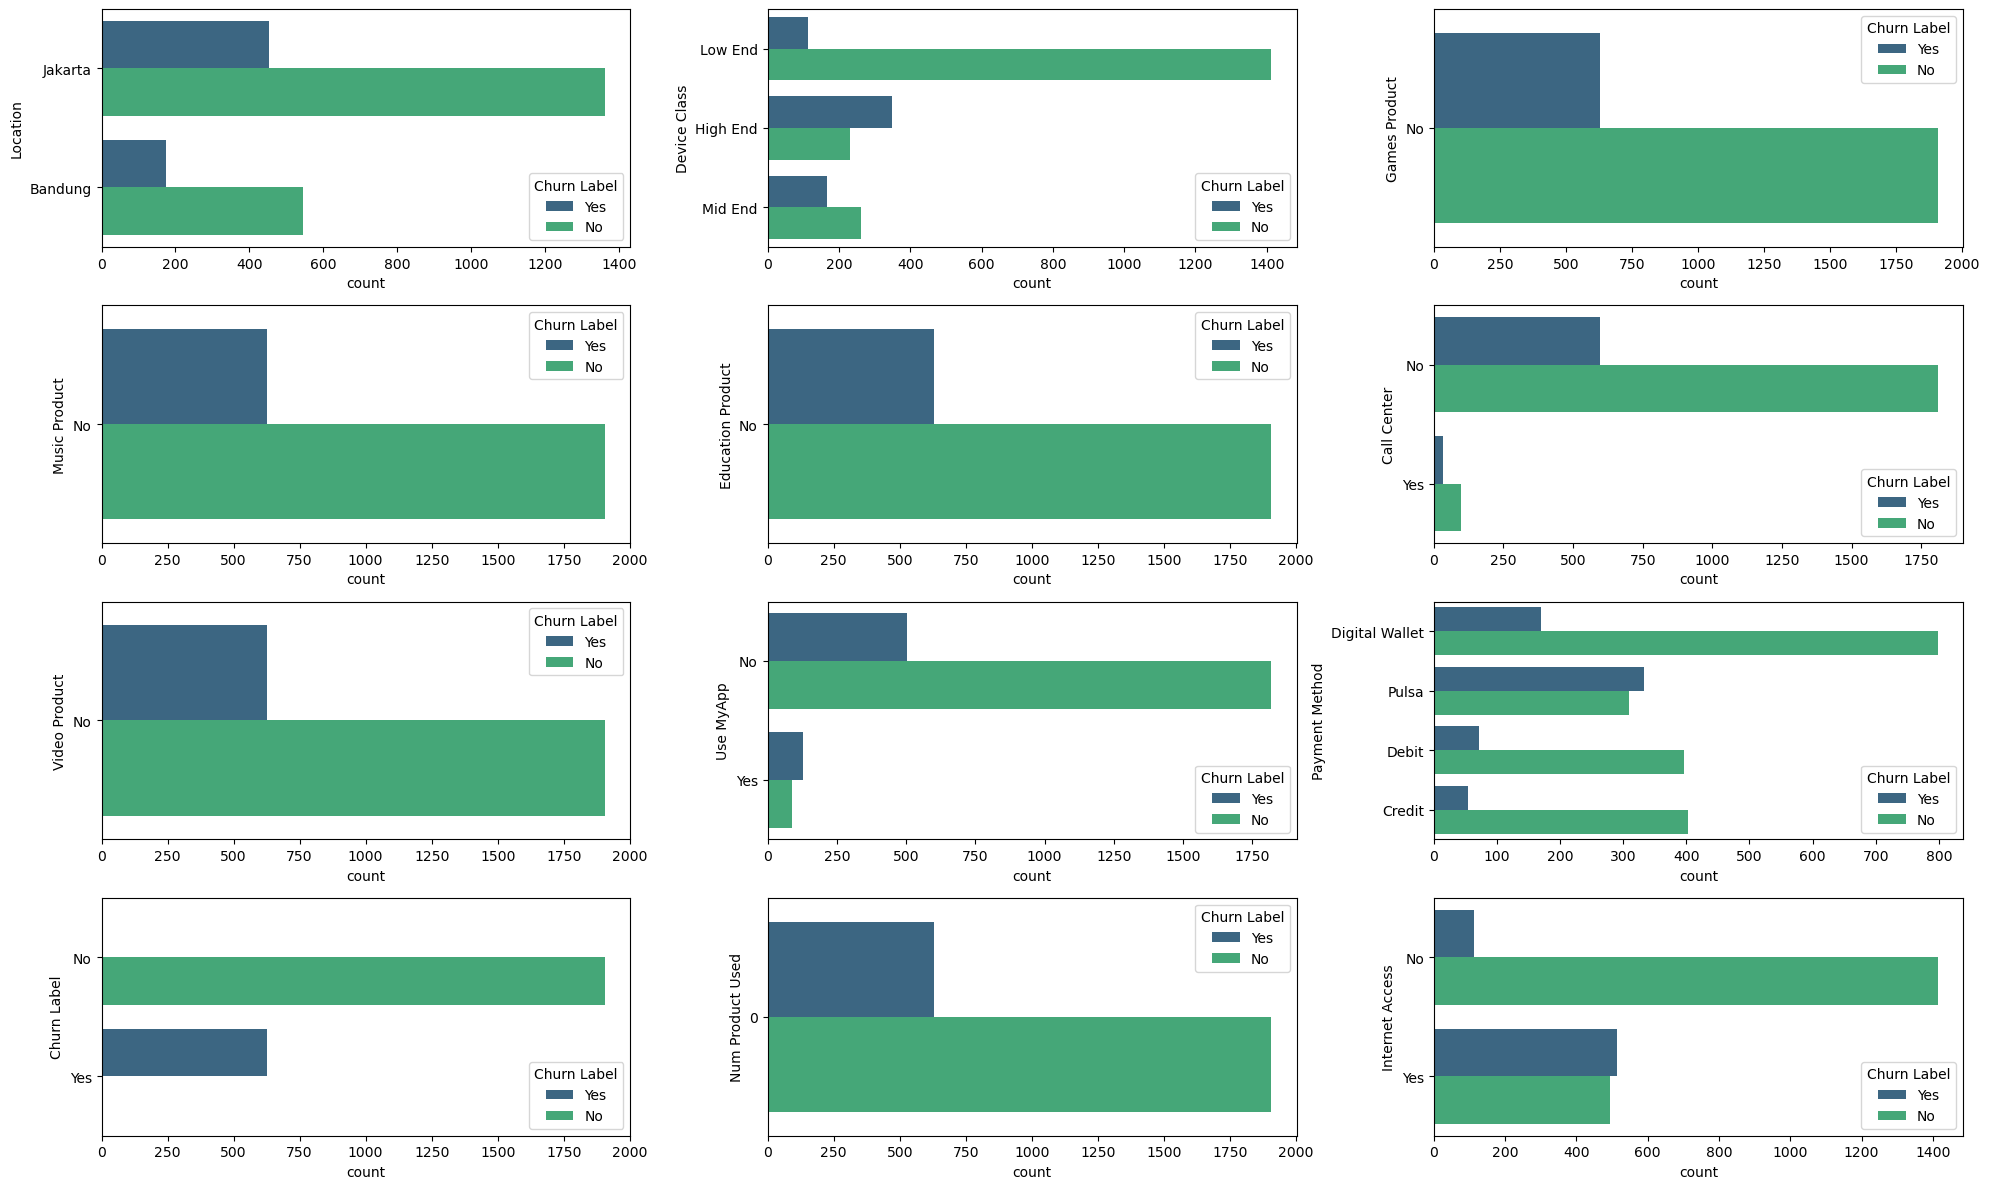

In [28]:
# Create Countplot for Each Categorical Feature
fig, axes = plt.subplots(4, 3, figsize=(20,12))
xy = [(0,0), (0,1), (0,2), (1,0), (1,1), (1,2), (2,0), (2,1), (2,2), (3,0), (3,1), (3,2), (4,0)]

for i in range(len(cat_cols)):
    if i == 0:
        sns.countplot(y=df[cat_cols[i]], palette='viridis',ax=axes[xy[i]], hue=df['Churn Label'])
    else:
        sns.countplot(y=df[cat_cols[i]], palette='viridis', order= df[cat_cols[i]].value_counts().index, ax=axes[xy[i]], hue=df['Churn Label'])
# axes[3, 1].axis('off')
# axes[3, 2].axis('off')
plt.tight_layout()